<a href="https://colab.research.google.com/github/sidmahurkar/Sentiment-Analysis-on-Abrogation-of-Article-370/blob/master/senti_using_textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Using textblob
from textblob import TextBlob
import io
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
from collections import Counter
from PIL import Image
import numpy as np
import urllib
import requests

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive")

In [0]:
with open('twit525.json') as json_file:
    twitter = json.load(json_file)

In [0]:
tweets = []
for tweet_info in twitter:
  tweet = tweet_info['text']
  tweets.append(tweet)

In [0]:
tweet = pd.DataFrame(tweets, 
               columns =['text'])

In [10]:
tweet.head()

,text
0,#KashmirWithModi\nWith the scrapping of Articl...
1,#SACREDGAMES2 #Article370 #15AugustBlackDay
2,Black day in remembrance of intelligence blund...
3,1. Pakistan has changed the demographics with ...
4,"BJP's Animated Explainer On ""How Article 370 W..."


In [0]:
# Preprocess
def preprocess_tweet(text):
  # # Remove any RT mentions present in the tweets.
  # text = re.sub(r'^RT[\s]+', ' ', text)
  # Remove any https links present to URL
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',text)
  # # Remove any  http links present to URL
  # text = re.sub('((www\.[^\s]+)|(http?://[^\s]+))','URL',text)
  # Convert any "#xyz" to "xyz" only
  text = re.sub(r'#([^\s]+)', r'\1', text)
  # Convert all the @ mentins to "at_USER"
  text = re.sub(r'@[A-Za-z0–9]+', 'at_USER', text)
  # Correct all multiple white spaces to a single white space
  text = re.sub('[\s]+', ' ', text)

  return text 

In [0]:
tweet['pros_text'] = tweet['text'].apply(preprocess_tweet)

In [0]:
#Sentiment analysis
# import textblob as TextBlob
# def polarity(text):
#   blob = TextBlob(text)
#   polarity = blob.sentiment.polarity
#   return polarity

# def subjectivity(text):
#   blob = TextBlob(text)
#   subjectivity = blob.sentiment.subjectivity
#   return subjectivity

polarity = (lambda x: TextBlob(x).sentiment.polarity)
subjectivity = (lambda x: TextBlob(x).sentiment.subjectivity)

tweet['polarity'] = tweet['pros_text'].apply(polarity)
tweet['subjectivity'] = tweet['pros_text'].apply(subjectivity)

In [0]:
# function to assign a sentiment to each tweet

def ratio(x):
  if x > 0:
    return "positive"
  elif x == 0:
    return "neutral"
  else:
    return "negative"

tweet['sentiment'] = tweet['polarity'].apply(ratio)

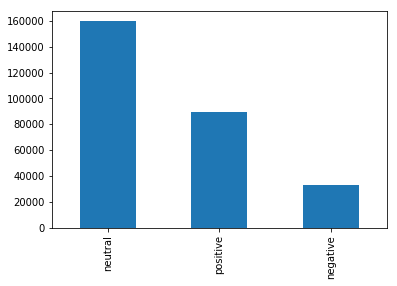

<Figure size 1080x1080 with 0 Axes>

In [16]:
tweet['sentiment'].value_counts().plot(kind = 'bar')
plt.figure(figsize=(15,15))
plt.show()